In [57]:
import os
import pandas as pd
import numpy as np

In [58]:
import shutil

def remove_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents successfully removed.")
    except Exception as e:
        print(f"An error occurred while removing the folder: {e}")



In [59]:
# remove folders
folder_to_remove = "sample-notebooks"
remove_folder(folder_to_remove)

An error occurred while removing the folder: [Errno 2] No such file or directory: 'sample-notebooks'


In [60]:
#-------------------------------------------------------------------------------------------------------

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
######################################################################################### seeing admissions.csv file

In [63]:
df = pd.read_csv('./mimic-iv-2.2/hosp/admissions.csv.gz')

In [64]:
df.isnull().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
language                     0
marital_status            9233
race                         0
edregtime               131949
edouttime               131949
hospital_expire_flag         0
dtype: int64

In [65]:
df.loc[:,'deathtime'].value_counts().value_counts()    #it's not reading the NaN.

count
1    8598
Name: count, dtype: int64

In [66]:
df.describe()

,subject_id,hadm_id,hospital_expire_flag
count,4.312310e+05,4.312310e+05,431231.000000
mean,1.500766e+07,2.500314e+07,0.019964
std,2.877498e+06,2.888180e+06,0.139876
min,1.000003e+07,2.000002e+07,0.000000
25%,1.251557e+07,2.250155e+07,0.000000
50%,1.501288e+07,2.500669e+07,0.000000
75%,1.749622e+07,2.750470e+07,0.000000
max,1.999999e+07,2.999993e+07,1.000000


In [67]:
#df0 = df.sample(n=10000)
df0 = df
len(df0)

431231

In [68]:
df0

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [69]:
#Conversão para datetime
df0['admittime'] = pd.to_datetime(df0['admittime'])
df0['dischtime'] = pd.to_datetime(df0['dischtime'])

In [71]:
def check_readmission(subdf):
    subdf = subdf.sort_values(by='admittime')
    time_differences = (subdf['admittime'].iloc[1:].reset_index(drop=True) - 
      subdf['dischtime'].iloc[0:-1].reset_index(drop = True)
    )
    readmission = (time_differences.dt.days < 30).astype(int)
    readmission = np.append(readmission,0)
    return readmission

target = (df0.groupby('subject_id').apply(check_readmission)).explode().to_frame()
target.reset_index(inplace=True)
target.columns = ['subject_id','target']

# Save the 'target' DataFrame with both 'subject_id' and 'hadm_id'
target_with_hadm = target.merge(df0[['subject_id', 'hadm_id']], on='subject_id', how='left')
target_with_hadm.drop_duplicates(subset=['subject_id', 'hadm_id'], inplace=True)

complete_df = df0.merge(target_with_hadm[['target','hadm_id']], on='hadm_id', how='left')
len(complete_df)

431231

In [72]:
#Keep only the rows where target is 1
within_30_days = complete_df[complete_df['target'] == 1]
within_30_days

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,target
16,10000826,20032235,2146-12-05 19:07:00,2146-12-12 16:30:00,NaN,EW EMER.,P54631,EMERGENCY ROOM,HOME,Other,ENGLISH,SINGLE,WHITE,2146-12-05 11:09:00,2146-12-05 20:54:00,0,1
17,10000826,21086876,2146-12-18 17:39:00,2146-12-24 19:55:00,NaN,DIRECT EMER.,P86FCY,CLINIC REFERRAL,HOME,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0,1
18,10000826,28289260,2146-12-31 00:43:00,2147-01-02 17:45:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOME,Other,ENGLISH,SINGLE,WHITE,2146-12-30 17:06:00,2146-12-31 02:10:00,0,1
19,10000883,25221576,2124-05-14 21:11:00,2124-05-22 10:40:00,NaN,DIRECT EMER.,P64BMC,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,SINGLE,WHITE,2124-05-14 15:13:00,2124-05-14 21:35:00,0,1
20,10000883,29957930,2124-05-14 17:25:00,2124-05-14 21:10:00,NaN,EU OBSERVATION,P6683B,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2124-05-14 15:13:00,2124-05-14 21:35:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431221,19999784,29234099,2119-12-05 09:31:00,2119-12-10 11:59:00,NaN,ELECTIVE,P86PTJ,PHYSICIAN REFERRAL,HOME,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0,1
431222,19999784,29324445,2120-05-28 09:07:00,2120-06-02 08:55:00,NaN,ELECTIVE,P86PTJ,PHYSICIAN REFERRAL,HOME,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0,1
431223,19999784,29355057,2119-10-17 10:28:00,2119-10-23 14:45:00,NaN,ELECTIVE,P86PTJ,PHYSICIAN REFERRAL,HOME,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0,1
431224,19999784,29889147,2120-10-25 09:43:00,2120-10-31 09:00:00,NaN,ELECTIVE,P86PTJ,PHYSICIAN REFERRAL,HOME,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0,1


In [73]:
len(within_30_days)

106141

In [74]:
within_30_days.nunique()

subject_id               24796
hadm_id                 106141
admittime               105803
dischtime               105393
deathtime                 1733
admission_type               9
admit_provider_id         1447
admission_location          11
discharge_location          13
insurance                    3
language                     2
marital_status               4
race                        33
edregtime                68352
edouttime                68372
hospital_expire_flag         2
target                       1
dtype: int64

In [75]:
within_30_days.isna().sum()   #contagem dos NaN

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               104408
admission_type               0
admit_provider_id            0
admission_location           0
discharge_location       26623
insurance                    0
language                     0
marital_status            1299
race                         0
edregtime                34573
edouttime                34573
hospital_expire_flag         0
target                       0
dtype: int64

In [76]:
#drop columns
columns_to_drop = ['language','edregtime','edouttime']
droped_30days_df = within_30_days.drop(columns=columns_to_drop)
droped_30days_df.isna().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               104408
admission_type               0
admit_provider_id            0
admission_location           0
discharge_location       26623
insurance                    0
marital_status            1299
race                         0
hospital_expire_flag         0
target                       0
dtype: int64

In [77]:
# Create a new binary column based of DEATHTIME; 1 - death; 0 - no death.
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].replace('NaN', int(0))
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].notna().astype(int)

In [78]:
droped_30days_df['BINARY_DEATH'].value_counts()

BINARY_DEATH
0    104408
1      1733
Name: count, dtype: int64

In [79]:
#drop columns DEATHTIME
columns_to_drop = ['deathtime']
droped_30days_df0 = droped_30days_df.drop(columns=columns_to_drop)
droped_30days_df0.isna().sum()

subject_id                  0
hadm_id                     0
admittime                   0
dischtime                   0
admission_type              0
admit_provider_id           0
admission_location          0
discharge_location      26623
insurance                   0
marital_status           1299
race                        0
hospital_expire_flag        0
target                      0
BINARY_DEATH                0
dtype: int64

In [80]:
droped_30days_df0['BINARY_DEATH'].value_counts()

BINARY_DEATH
0    104408
1      1733
Name: count, dtype: int64

In [81]:
#Só mostrar a informaçao por cada subject_id
dropedid_30days_df0 = droped_30days_df0.drop_duplicates(subset='subject_id', keep='first')
len(dropedid_30days_df0)

24796

/home/loucao/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


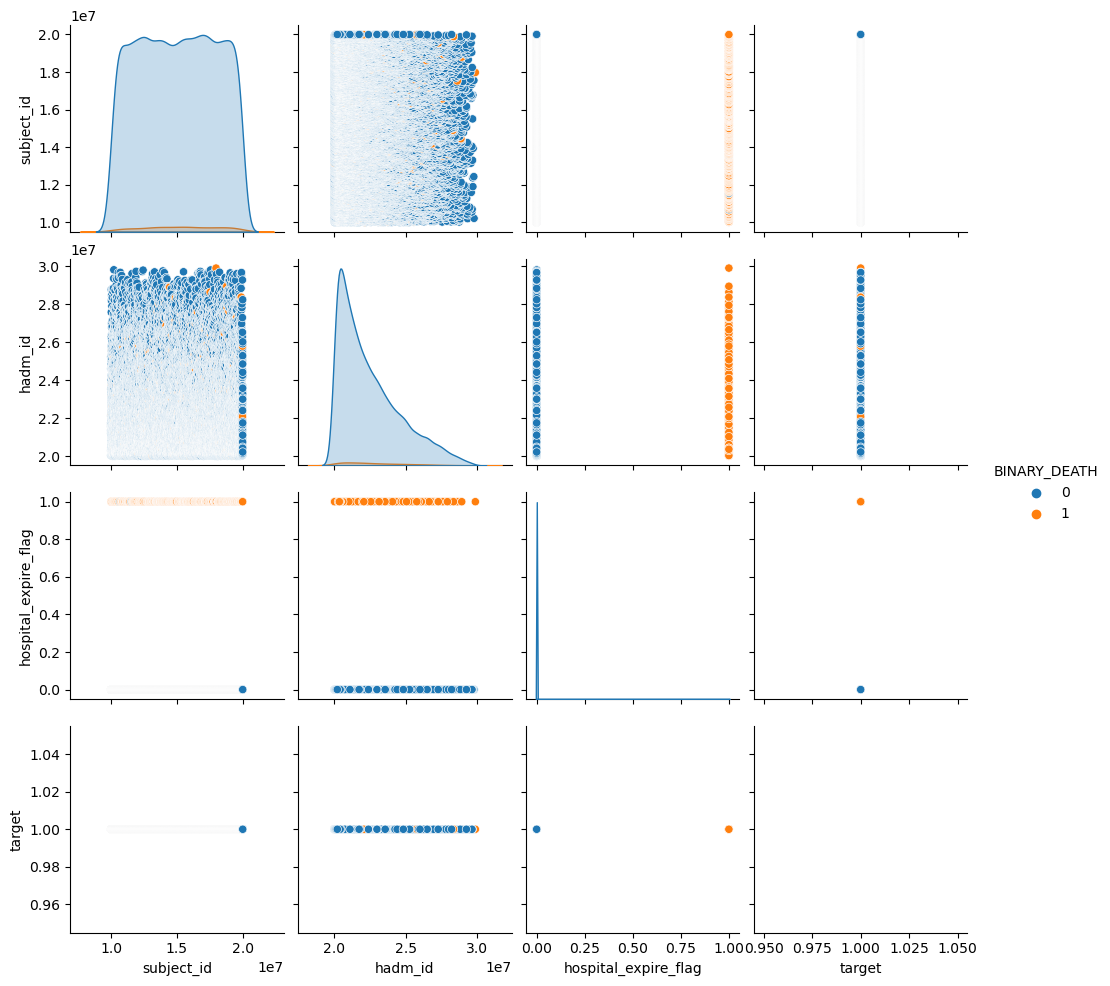

In [82]:
sns.pairplot(dropedid_30days_df0, hue='BINARY_DEATH')

In [83]:
most_frequent_admissionplace= droped_30days_df0['admission_location'].value_counts().index[0]
most_frequent_admissionplace

'EMERGENCY ROOM'

In [84]:
most_frequent_admissiontype= droped_30days_df0['admission_type'].value_counts().index[0]
most_frequent_admissiontype

'EW EMER.'

In [85]:
most_frequent_discharge = droped_30days_df0['discharge_location'].value_counts().index[0]
most_frequent_discharge 

'HOME'

In [86]:
######################################################################################### seeing dignoses_icd.csv file

In [87]:
df1 = pd.read_csv('./mimic-iv-2.2/hosp/diagnoses_icd.csv.gz')

In [88]:
df1_1 = pd.read_csv('./mimic-iv-2.2/hosp/d_icd_diagnoses.csv.gz')

In [89]:
most_frequent_diagnosis = df1['icd_code'].value_counts().index[0]
most_frequent_diagnosis

'4019'

In [90]:
secondmost_frequent_diagnosis = df1['icd_code'].value_counts().index[1]
secondmost_frequent_diagnosis

'2724'

In [91]:
thirdmost_frequent_diagnosis = df1['icd_code'].value_counts().index[2]
thirdmost_frequent_diagnosis

'I10'

In [92]:
fourmost_frequent_diagnosis = df1['icd_code'].value_counts().index[3]
fourmost_frequent_diagnosis

'E785'

In [93]:
######################################################################################### seeing icustays.csv file

In [94]:
df2 = pd.read_csv('./mimic-iv-2.2/icu/icustays.csv.gz')

In [95]:
most_frequent_careunit = df2['first_careunit'].value_counts().index[0]
most_frequent_careunit

'Medical Intensive Care Unit (MICU)'

In [96]:
most_frequent_endcareunit = df2['last_careunit'].value_counts().index[0]
most_frequent_endcareunit

'Medical Intensive Care Unit (MICU)'

In [97]:
frequent_patient_icu = df2['subject_id'].value_counts().to_frame()
frequent_patient_icu.reset_index(inplace=True)
frequent_patient_icu.rename(columns={'index': 'subject_id','subject_id' : 'count_icu'}, inplace=True)
frequent_patient_icu

,count_icu,count
0,18358138,37
1,17585185,33
2,12468016,33
3,13269859,30
4,18676703,26
...,...,...
50915,13794732,1
50916,13795136,1
50917,13795513,1
50918,13795693,1


In [98]:
most_frequent_patient = df2['subject_id'].value_counts().index[0] 
most_frequent_patient

18358138

In [99]:
#----------------------------------------------------------------------------------

In [100]:
# JUNTAR DATASETS - criar dataset new30df

In [101]:
df3 = pd.read_csv('./mimic-iv-2.2/hosp/patients.csv.gz')
df3

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


In [102]:
#drop columns 
columns_to_drop = ['hadm_id','admittime','dischtime','admit_provider_id','admission_location','insurance','hospital_expire_flag']
new30df = dropedid_30days_df0.drop(columns=columns_to_drop)

In [111]:
frequent_patient_adm = droped_30days_df0['subject_id'].value_counts().to_frame()
frequent_patient_adm.reset_index(inplace=True)
frequent_patient_adm.rename(columns={'count': 'count_adm'},inplace=True)
frequent_patient_adm

,subject_id,count_adm
0,15464144,185
1,16662316,142
2,13475033,97
3,17011846,94
4,12468016,89
...,...,...
24791,16560909,2
24792,16562319,2
24793,12905732,2
24794,16563580,2


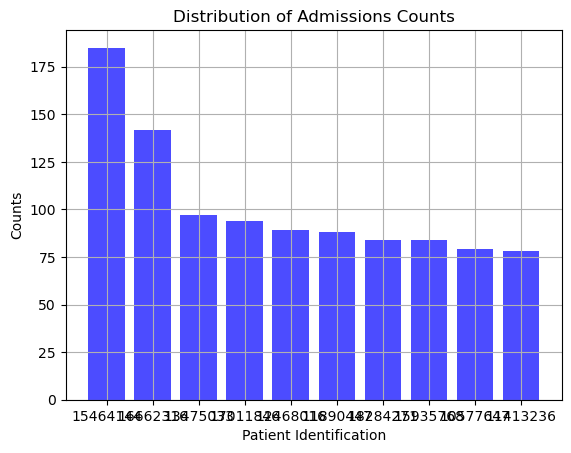

In [112]:
top_10 = frequent_patient_adm.sort_values(by='count_adm', ascending=False).head(10)
plt.bar(top_10['subject_id'].astype(str), top_10['count_adm'], color='blue', alpha=0.7)
plt.xlabel('Patient Identification')
plt.ylabel('Counts')
plt.title('Distribution of Admissions Counts')
plt.grid(True)
plt.show()

In [ ]:
new30df

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH
16,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0
19,10000883,DIRECT EMER.,HOME,SINGLE,WHITE,1,0
23,10000935,EU OBSERVATION,NaN,SINGLE,BLACK/AFRICAN AMERICAN,1,0
36,10001186,SURGICAL SAME DAY ADMISSION,HOME,MARRIED,WHITE,1,0
39,10001217,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,1,0
...,...,...,...,...,...,...,...
431169,19998626,DIRECT EMER.,HOME,SINGLE,WHITE,1,0
431176,19998843,EW EMER.,DIED,SINGLE,UNKNOWN,1,0
431195,19999303,DIRECT EMER.,HOME,DIVORCED,WHITE,1,0
431197,19999379,EU OBSERVATION,NaN,MARRIED,WHITE,1,0


In [113]:
new30df1 = new30df.merge(df3[['subject_id','gender','anchor_age']], on='subject_id', how='left')
new30df1

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age
0,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0,F,32
1,10000883,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,M,20
2,10000935,EU OBSERVATION,NaN,SINGLE,BLACK/AFRICAN AMERICAN,1,0,F,52
3,10001186,SURGICAL SAME DAY ADMISSION,HOME,MARRIED,WHITE,1,0,F,46
4,10001217,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,1,0,F,55
...,...,...,...,...,...,...,...,...,...
24791,19998626,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,F,35
24792,19998843,EW EMER.,DIED,SINGLE,UNKNOWN,1,0,M,45
24793,19999303,DIRECT EMER.,HOME,DIVORCED,WHITE,1,0,F,61
24794,19999379,EU OBSERVATION,NaN,MARRIED,WHITE,1,0,F,91


In [ ]:
new30df2 = new30df1.merge(frequent_patient_icu[['subject_id','count_icu']], on='subject_id', how='left')
new30df2['count_icu'].fillna(0, inplace=True)
new30df2

KeyError: "['subject_id'] not in index"

In [114]:
new30df3 = new30df2.merge(frequent_patient_adm[['subject_id','count_adm']], on='subject_id', how='left')
new30df3['count_adm'].fillna(0, inplace=True)
new30df3

NameError: name 'new30df2' is not defined

In [ ]:
df11 = df1.merge(df1_1[['icd_code','long_title']], on='icd_code', how='left')
df11

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000032,22595853,2,78959,9,Other ascites
2,10000032,22595853,3,5715,9,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,9,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,9,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...,...
4860275,19999987,23865745,7,41401,9,Coronary atherosclerosis of native coronary ar...
4860276,19999987,23865745,8,78039,9,Other convulsions
4860277,19999987,23865745,9,0413,9,Friedländer's bacillus infection in conditions...
4860278,19999987,23865745,10,36846,9,Homonymous bilateral field defects


In [ ]:
filtered_df11 = df11.loc[df11['seq_num'] == 1]
len(filtered_df11)
df11droped = filtered_df11.drop(columns = ['hadm_id','seq_num','icd_version'])

In [ ]:
df11droped

,subject_id,icd_code,long_title
0,10000032,5723,Portal hypertension
8,10000032,07071,Unspecified viral hepatitis C with hepatic coma
16,10000032,07054,Chronic hepatitis C without mention of hepatic...
27,10000032,45829,Other iatrogenic hypotension
41,10000068,30500,"Alcohol abuse, unspecified"
...,...,...,...
4860209,19999828,T8141XA,"Infection following a procedure, superficial i..."
4860228,19999828,T8131XA,Disruption of external operation (surgical) wo...
4860250,19999840,3453,Grand mal status
4860262,19999840,43491,"Cerebral artery occlusion, unspecified with ce..."


In [ ]:
#---------------------------------------------------------------------------------- Plots

In [ ]:
len(new30df3)

24796

In [ ]:
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm
0,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0,F,32,0.0,3
1,10000883,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,M,20,0.0,2
2,10000935,EU OBSERVATION,NaN,SINGLE,BLACK/AFRICAN AMERICAN,1,0,F,52,0.0,5
3,10001186,SURGICAL SAME DAY ADMISSION,HOME,MARRIED,WHITE,1,0,F,46,0.0,3
4,10001217,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,1,0,F,55,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...
24791,19998626,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,F,35,0.0,2
24792,19998843,EW EMER.,DIED,SINGLE,UNKNOWN,1,0,M,45,1.0,2
24793,19999303,DIRECT EMER.,HOME,DIVORCED,WHITE,1,0,F,61,0.0,2
24794,19999379,EU OBSERVATION,NaN,MARRIED,WHITE,1,0,F,91,0.0,2


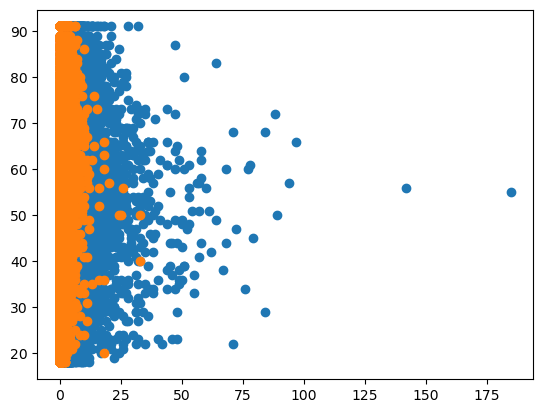

In [ ]:
Age = new30df3['anchor_age']
count_adm = new30df3['count_adm']
count_icu = new30df3['count_icu']
plt.scatter(count_adm, Age)
plt.scatter(count_icu, Age)
plt.show()

(array([2404., 1929., 1844., 2188., 2796., 3053., 3560., 2631., 2292.,
        2099.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <BarContainer object of 10 artists>)

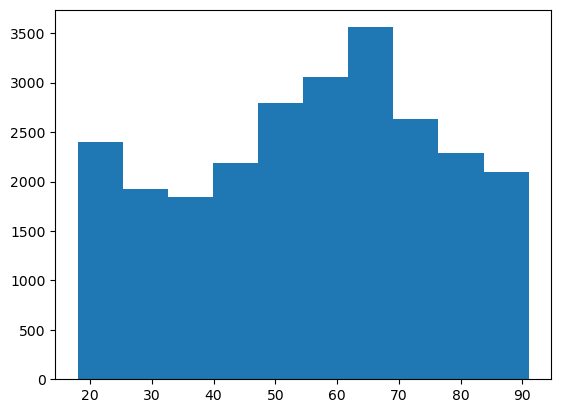

In [ ]:
plt.hist(Age)

#plt.savefig('<path_to_save>.png')

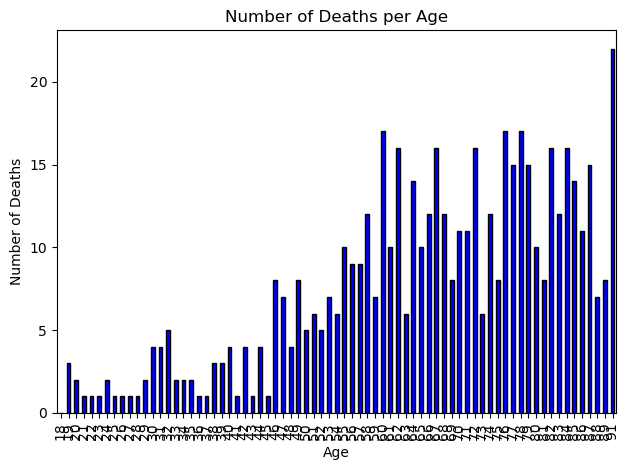

In [ ]:
age_groups = new30df3.groupby('anchor_age')['BINARY_DEATH'].sum()

age_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Deaths per Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  

#plt.savefig('<path_to_save>.png')

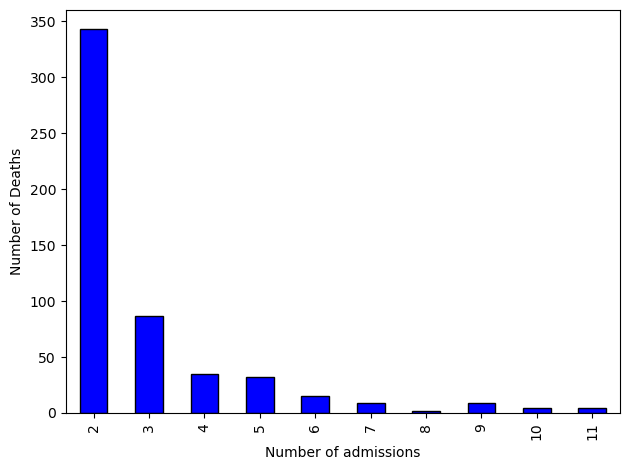

In [ ]:
countsadm_groups = new30df3.groupby('count_adm')['BINARY_DEATH'].sum().head(10)

countsadm_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()

#plt.savefig('<path_to_save>.png')

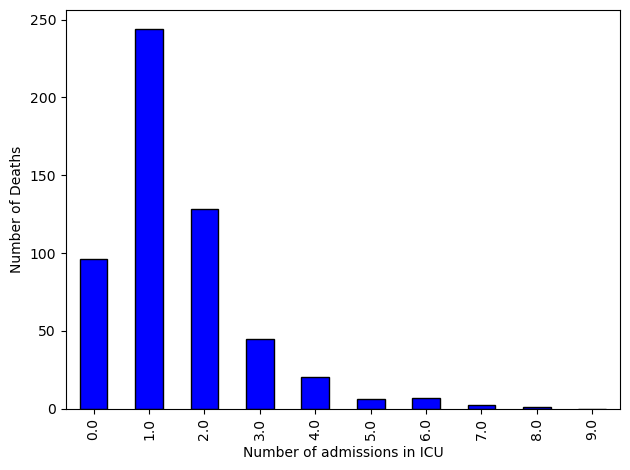

In [ ]:
countsicu_groups = new30df3.groupby('count_icu')['BINARY_DEATH'].sum().head(10)

countsicu_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions in ICU')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  #Quem vai para ICU, quase que não escapa   . 0 era Nan values. 

#plt.savefig('<path_to_save>.png')

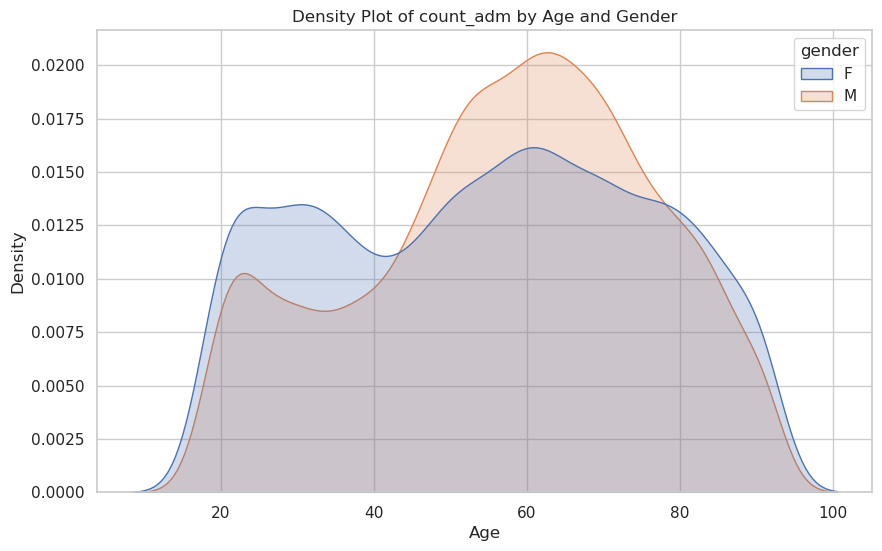

In [ ]:
# Create a KDE (Kernel Density Estimation) plot using seaborn
count_adm = new30df3[['count_adm','gender','anchor_age']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=count_adm, x='anchor_age', hue="gender", common_norm=False, fill=True)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of count_adm by Age and Gender")

# Display the plot
plt.show()

In [ ]:
#################################################################################################

In [ ]:
new30df4 = pd.merge(new30df3,df11droped, on='subject_id', how='left')
new30df4

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
0,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0,F,32,0.0,3,5712,Alcoholic cirrhosis of liver
1,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0,F,32,0.0,3,5711,Acute alcoholic hepatitis
2,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0,F,32,0.0,3,5723,Portal hypertension
3,10000883,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,M,20,0.0,2,29633,"Major depressive affective disorder, recurrent..."
4,10000883,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,M,20,0.0,2,29620,"Major depressive affective disorder, single ep..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106446,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
106447,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
106448,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
106449,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy


In [ ]:
len(new30df4)

106451

In [ ]:
len(df0)

431231

In [ ]:
#Só mostrar a informaçao por cada subject_id
new30df4drop = new30df4.drop_duplicates(subset='subject_id', keep='first')
len(new30df4drop)

24796

In [ ]:
new30df4drop


,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
0,10000826,EW EMER.,HOME,SINGLE,WHITE,1,0,F,32,0.0,3,5712,Alcoholic cirrhosis of liver
3,10000883,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,M,20,0.0,2,29633,"Major depressive affective disorder, recurrent..."
5,10000935,EU OBSERVATION,NaN,SINGLE,BLACK/AFRICAN AMERICAN,1,0,F,52,0.0,5,78701,Nausea with vomiting
10,10001186,SURGICAL SAME DAY ADMISSION,HOME,MARRIED,WHITE,1,0,F,46,0.0,3,99832,Disruption of external operation (surgical) wound
13,10001217,EW EMER.,HOME HEALTH CARE,MARRIED,WHITE,1,0,F,55,2.0,2,3240,Intracranial abscess
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106426,19998626,DIRECT EMER.,HOME,SINGLE,WHITE,1,0,F,35,0.0,2,56949,Other specified disorders of rectum and anus
106428,19998843,EW EMER.,DIED,SINGLE,UNKNOWN,1,0,M,45,1.0,2,80325,"Other closed skull fracture with subarachnoid,..."
106429,19999303,DIRECT EMER.,HOME,DIVORCED,WHITE,1,0,F,61,0.0,2,99889,Other specified complications of procedures no...
106431,19999379,EU OBSERVATION,NaN,MARRIED,WHITE,1,0,F,91,0.0,2,7804,Dizziness and giddiness


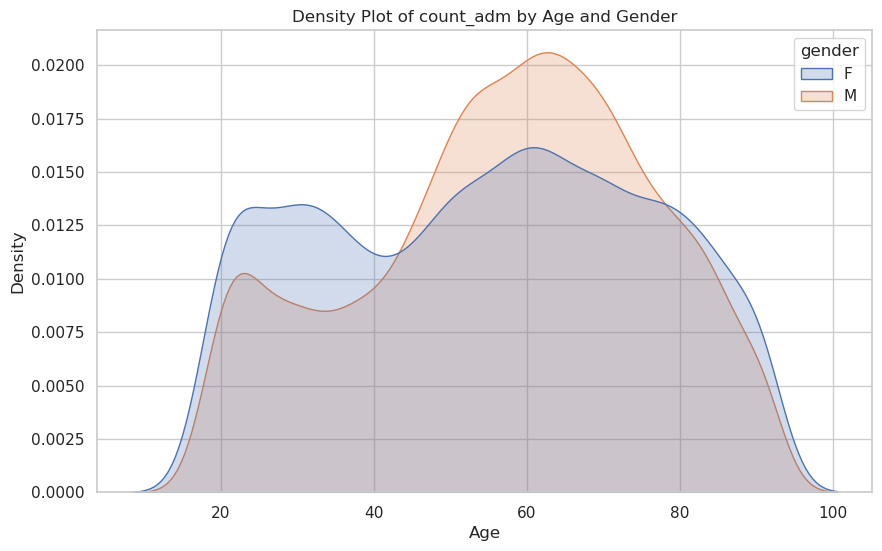

In [ ]:
# Create a KDE (Kernel Density Estimation) plot using seaborn
count_adm = new30df4drop[['count_adm','gender','anchor_age']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=count_adm, x='anchor_age', hue="gender", common_norm=False, fill=True)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of count_adm by Age and Gender")

# Display the plot
plt.show()      #praticamente igual ao anterior

In [ ]:
# Count occurrences of the word "hypertension" in the "long_title" column
hypertension_count = new30df4drop['long_title'].str.contains('hypertension', case=False).sum()
hypertension_count 

160

In [ ]:
# Count occurrences of the word "hyperlipidemia" in the "long_title" column
hyperlipidemia_count = new30df4drop['long_title'].str.contains('hyperlipidemia', case=False).sum()
hyperlipidemia_count

0

In [ ]:
from collections import Counter
import re

In [ ]:
# Convert 'icd_code' to strings
new30df4drop['icd_code'] = new30df4drop['icd_code'].astype(str)

# Count occurrences of each 'icd_code'
icd_counts = Counter(new30df4drop['long_title'])
icd_code_counts = Counter(new30df4drop['icd_code'])
# Find the most common 'icd_code' strings
most_common_icd = icd_counts.most_common(5)
most_common_icd_codes = icd_code_counts.most_common(5)
 
# Extract the codes and counts
icd = [icd for icd, count in most_common_icd]
icd_codes = [code for code, count in most_common_icd_codes]
print(icd)
print(icd_codes)
code_counts = [count for code, count in most_common_icd_codes]


['Major depressive disorder, single episode, unspecified', 'Depressive disorder, not elsewhere classified', 'Encounter for antineoplastic chemotherapy', 'Coronary atherosclerosis of native coronary artery', 'Other postoperative infection']
['F329', '311', '41401', '99859', '2989']


/tmp/ipykernel_4646/2902971257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new30df4drop['icd_code'] = new30df4drop['icd_code'].astype(str)


In [ ]:
# Filter the dataset for the common codes
filtered_dataset = new30df4drop[new30df4drop['long_title'].isin(icd)]
filtered_dataset

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
175,10014729,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE - OTHER EUROPEAN,1,0,F,21,1.0,2,99859,Other postoperative infection
198,10019957,SURGICAL SAME DAY ADMISSION,HOME HEALTH CARE,MARRIED,WHITE,1,0,M,72,1.0,2,41401,Coronary atherosclerosis of native coronary ar...
268,10030549,DIRECT EMER.,HOME,MARRIED,BLACK/AFRICAN AMERICAN,1,0,M,72,0.0,4,Z5111,Encounter for antineoplastic chemotherapy
483,10053207,EW EMER.,SKILLED NURSING FACILITY,WIDOWED,WHITE,1,0,F,55,3.0,7,99859,Other postoperative infection
585,10062692,EU OBSERVATION,NaN,SINGLE,WHITE,1,0,F,41,0.0,2,311,"Depressive disorder, not elsewhere classified"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105952,19947724,DIRECT EMER.,SKILLED NURSING FACILITY,MARRIED,WHITE,1,0,F,83,0.0,2,99859,Other postoperative infection
105956,19948788,EU OBSERVATION,NaN,SINGLE,BLACK/CAPE VERDEAN,1,0,F,43,0.0,2,311,"Depressive disorder, not elsewhere classified"
106142,19973096,EU OBSERVATION,NaN,SINGLE,WHITE,1,0,M,27,0.0,2,F329,"Major depressive disorder, single episode, uns..."
106320,19992507,ELECTIVE,HOME,DIVORCED,OTHER,1,0,F,61,0.0,8,V5811,Encounter for antineoplastic chemotherapy


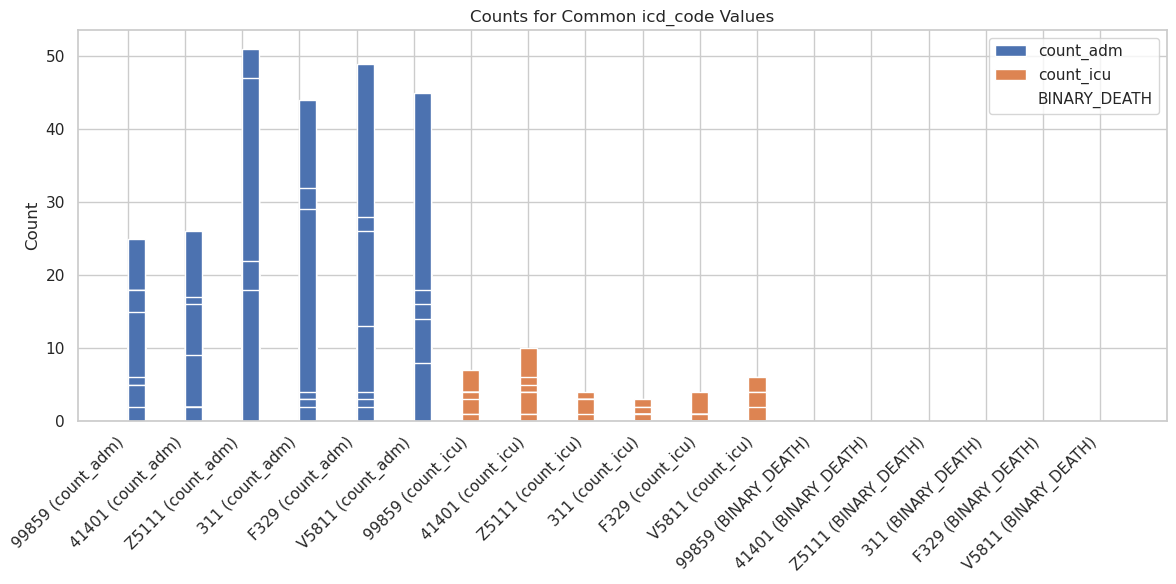

In [ ]:
# Grouped bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(filtered_dataset['icd_code'] + ' (count_adm)', filtered_dataset['count_adm'], width=0.3, align='edge', label='count_adm')
plt.bar(filtered_dataset['icd_code'] + ' (count_icu)', filtered_dataset['count_icu'], width=0.3, align='center', label='count_icu')
plt.bar(filtered_dataset['icd_code'] + ' (BINARY_DEATH)', filtered_dataset['BINARY_DEATH'], width=0.3, align='edge', label='BINARY_DEATH', alpha=0)
plt.ylabel('Count')
plt.title('Counts for Common icd_code Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#plt.savefig('<path_to_save>.png')

In [ ]:
# Convert the "long_title" column to strings
new30df4drop['long_title'] = new30df4drop['long_title'].astype(str)

# Concatenate all "long_title" strings
concatenated_text = ' '.join(new30df4drop['long_title'])

# Tokenize the text into wo@tag:notebookOutputLayoutrds
words = re.findall(r'\w+', concatenated_text.lower())  # Convert to lowercase for case-insensitive counting

# Filter words with more than 5 letters
filtered_words = [word for word in words if len(word) > 5 and "unspecified" not in word and "without" not in word  and "mention" not in word]

# Count occurrences of each word
word_counts = Counter(filtered_words)

# Find the most common word
most_common_word, most_common_count = word_counts.most_common(1)[0]

print("Most common word:", most_common_word)
print("Count:", most_common_count)

Most common word: disorder
Count: 2679


/tmp/ipykernel_4646/118066361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new30df4drop['long_title'] = new30df4drop['long_title'].astype(str)


In [ ]:
# Find the most common word
most_common_words = word_counts.most_common(10)

print("Ten most common words")
for word, count in most_common_words:
    print(word, "-", count)

Ten most common words
disorder - 2679
neoplasm - 1571
depressive - 1471
encounter - 1467
episode - 1425
malignant - 1417
chronic - 1244
initial - 1129
infection - 1107
specified - 1071


In [ ]:
################# in not dropped file: new30df4

In [ ]:
# Convert 'icd_code' to strings
new30df4['icd_code'] = new30df4['icd_code'].astype(str)

# Count occurrences of each 'icd_code'
bicd_counts = Counter(new30df4['long_title'])
bicd_code_counts = Counter(new30df4['icd_code'])
# Find the most common 'icd_code' strings
bmost_common_icd = icd_counts.most_common(5)
bmost_common_icd_codes = icd_code_counts.most_common(5)
 
# Extract the codes and counts
bicd = [icd for icd, count in bmost_common_icd]
bicd_codes = [code for code, count in bmost_common_icd_codes]
print(icd)
print(icd_codes)
bcode_counts = [count for code, count in bmost_common_icd_codes]


['Major depressive disorder, single episode, unspecified', 'Depressive disorder, not elsewhere classified', 'Encounter for antineoplastic chemotherapy', 'Coronary atherosclerosis of native coronary artery', 'Other postoperative infection']
['F329', '311', '41401', '99859', '2989']


In [ ]:
# Filter the dataset for the common codes
bfiltered_dataset = new30df4[new30df4['long_title'].isin(bicd)]
bfiltered_dataset

,subject_id,admission_type,discharge_location,marital_status,race,target,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,icd_code,long_title
26,10001884,EU OBSERVATION,NaN,MARRIED,BLACK/AFRICAN AMERICAN,1,0,F,68,1.0,22,41401,Coronary atherosclerosis of native coronary ar...
50,10002930,EU OBSERVATION,NaN,SINGLE,BLACK/AFRICAN AMERICAN,1,0,F,48,2.0,12,311,"Depressive disorder, not elsewhere classified"
52,10002930,EU OBSERVATION,NaN,SINGLE,BLACK/AFRICAN AMERICAN,1,0,F,48,2.0,12,311,"Depressive disorder, not elsewhere classified"
90,10007920,AMBULATORY OBSERVATION,NaN,DIVORCED,WHITE,1,0,M,52,1.0,13,311,"Depressive disorder, not elsewhere classified"
98,10010231,OBSERVATION ADMIT,HOME,SINGLE,HISPANIC/LATINO - GUATEMALAN,1,0,M,57,0.0,9,Z5111,Encounter for antineoplastic chemotherapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106446,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
106447,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
106448,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy
106449,19999784,ELECTIVE,HOME HEALTH CARE,SINGLE,BLACK/AFRICAN AMERICAN,1,0,M,57,0.0,18,Z5111,Encounter for antineoplastic chemotherapy


In [ ]:
########################################################################## SAVE dataset

In [ ]:
csv_path = 'LR_1df.csv'
new30df4drop.to_csv(csv_path, index=False)

In [ ]:
##########################################################################